### I have embarked on a project to explore the difference between investing in ETFs vs individual stocks

The goal of this project is to eventually create an application that houses all of an individual's investment accounts, with the ability to compare against benchmarks, and also visualize predicted gains for retirement, showing the importance of investing early and often.


In this notebook, I will be working with an API, and visualizing some basic EDA

In [32]:
# Importing initial libraries.
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import bs4
import requests
from bs4 import BeautifulSoup
from pandas_datareader import data, wb
from alpha_vantage.timeseries import TimeSeries
import time
%matplotlib inline

API using alpha_vantage.com

In [33]:
api_key = 'TN6KAGZRKLYYKWVL'

In [67]:
ts = TimeSeries(key=api_key, output_format='pandas')
VTI, meta_data = ts.get_daily_adjusted(symbol='VTI', outputsize = 'full')
VTI.tail()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2019-10-09,147.85,148.59,147.5200,148.08,148.08,3294600.0,0.0,1.0
2019-10-10,148.00,149.50,147.9900,149.03,149.03,3508900.0,0.0,1.0
2019-10-11,150.51,151.90,150.4700,150.63,150.63,3377100.0,0.0,1.0
2019-10-14,150.52,150.75,150.2500,150.49,150.49,1213500.0,0.0,1.0
2019-10-15,151.03,152.33,150.9339,151.97,151.97,2152924.0,0.0,1.0


In [48]:
close_data = data['4. close']
close_data.tail()

date
2019-10-09    148.08
2019-10-10    149.03
2019-10-11    150.63
2019-10-14    150.49
2019-10-15    151.97
Name: 4. close, dtype: float64

In [49]:
percentage_change = close_data.pct_change()
percentage_change.tail()

date
2019-10-09    0.009201
2019-10-10    0.006415
2019-10-11    0.010736
2019-10-14   -0.000929
2019-10-15    0.009835
Name: 4. close, dtype: float64

In [68]:
AAPL, meta_data = ts.get_daily_adjusted(symbol='AAPL', outputsize = 'full')
AAPL = AAPL['4. close']

BND, meta_data = ts.get_daily_adjusted(symbol='BND', outputsize = 'full')
BND = BND['4. close']

FB, meta_data = ts.get_daily_adjusted(symbol='FB', outputsize = 'full')
FB = FB['4. close']

VXUS, meta_data = ts.get_daily_adjusted(symbol='VXUS', outputsize = 'full')
VXUS = VXUS['4. close']

VTI = VTI['4. close']

In [69]:
tickers = ['AAPL', 'BND', 'FB', 'VTI', 'VXUS']

In [80]:
stock_close = pd.concat([AAPL, BND, FB, VTI, VXUS], axis=1, keys=tickers)
stock_close.head()

,AAPL,BND,FB,VTI,VXUS
date,,,,,
1999-10-18,73.250,NaN,NaN,NaN,NaN
1999-10-19,68.500,NaN,NaN,NaN,NaN
1999-10-20,75.125,NaN,NaN,NaN,NaN
1999-10-21,76.125,NaN,NaN,NaN,NaN
1999-10-22,73.938,NaN,NaN,NaN,NaN


In [81]:
stock_close.columns.names = ['Bank Ticker']
stock_close.dropna(thresh=5, inplace=True)
stock_close.head()

Bank Ticker,AAPL,BND,FB,VTI,VXUS
date,,,,,
2012-05-18,530.38,84.09,38.232,66.42,39.96
2012-05-21,561.28,84.10,34.030,67.65,40.73
2012-05-22,556.97,83.96,31.000,67.67,40.61
2012-05-23,570.56,84.02,32.000,67.79,40.29
2012-05-24,565.32,83.93,33.030,67.92,40.11


In [83]:
for tick in tickers:
    print(str(tick) + ' ' + str(bank_stocks[tick].max()))

AAPL 702.1
BND 85.36
FB 217.5
VTI 155.49
VXUS 61.17


In [90]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

AttributeError: 'Index' object has no attribute 'get_loc_level'

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [16]:
returns = pd.DataFrame()
returns

""


In [88]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick].pct_change()
returns.tail()

,AAPL Return,BND Return,FB Return,VTI Return,VXUS Return
Date,,,,,
2019-10-09,0.011720,-0.001180,0.011814,0.009201,0.007918
2019-10-10,0.013478,-0.003071,0.001001,0.006415,0.007463
2019-10-11,0.026598,-0.003673,0.023107,0.010736,0.015984
2019-10-14,-0.001439,0.001665,-0.004941,-0.000929,-0.004029
2019-10-15,-0.002332,-0.002612,0.030609,0.009835,0.010403


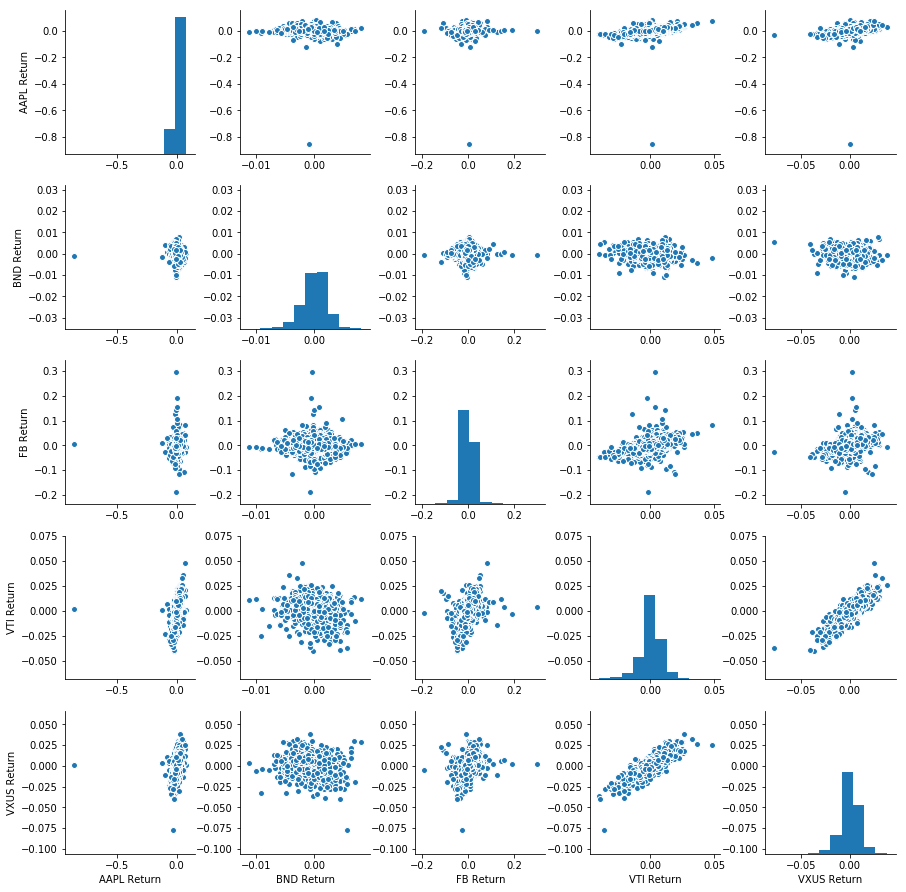

In [89]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

In [19]:
# Worst Drop 
returns.idxmin()
# returns.min()

AAPL Return   2013-01-24
BND Return    2013-07-05
FB Return     2018-07-26
VTI Return    2015-08-24
VXUS Return   2016-06-24
dtype: datetime64[ns]

In [92]:
returns.idxmax()

AAPL Return   2014-04-24
BND Return    2013-09-18
FB Return     2013-07-25
VTI Return    2018-12-26
VXUS Return   2012-06-29
dtype: datetime64[ns]

In [21]:
returns.std()

AAPL Return    0.016038
BND Return     0.002011
FB Return      0.023015
VTI Return     0.008250
VXUS Return    0.009084
dtype: float64

In [22]:
returns.loc['2015-01-01':'2015-12-31'].std()

AAPL Return    0.016805
BND Return     0.002338
FB Return      0.016173
VTI Return     0.009581
VXUS Return    0.010567
dtype: float64

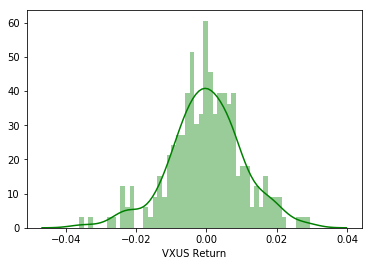

In [25]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['VXUS Return'],color='green',bins=50)

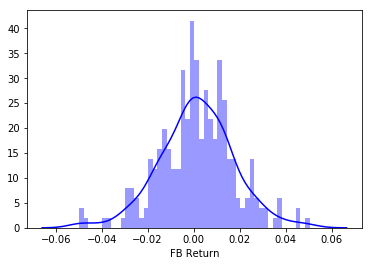

In [24]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['FB Return'],color='blue',bins=50)

In [26]:
# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

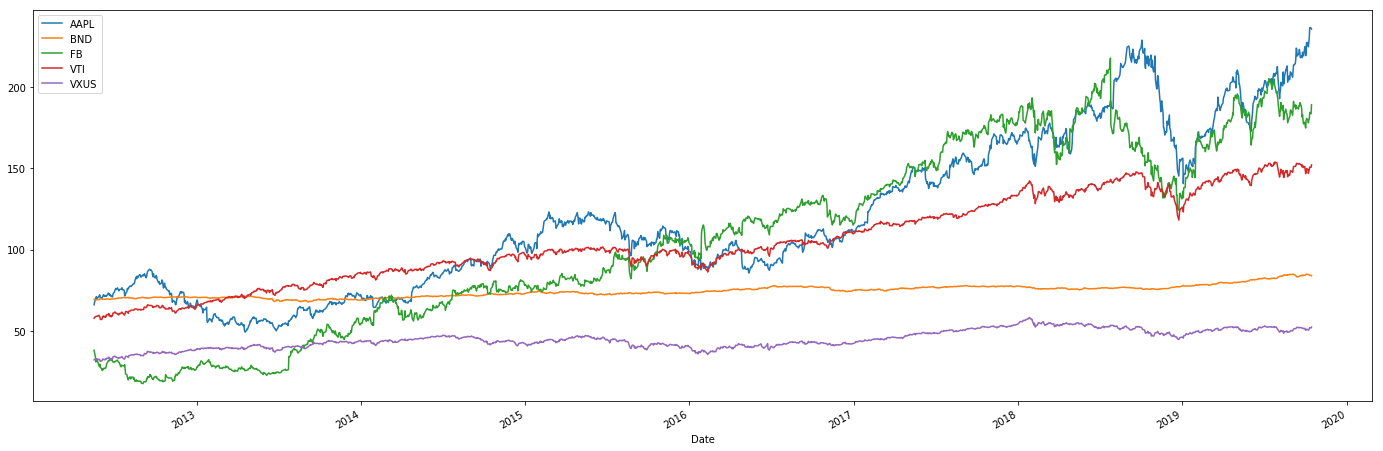

In [27]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(24,8),label=tick)
plt.legend()

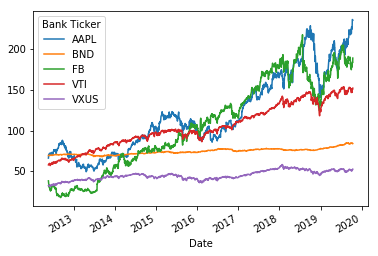

In [28]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [94]:
#bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

In [93]:
AAPL2, meta_data = ts.get_daily_adjusted(symbol='AAPL', outputsize = 'full')
AAPL2.ix['2014-01-01':'2014-12-31']

c:\python36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2014-01-02,555.6800,557.0300,552.0210,553.130,71.3207,58671200.0,0.0000,1.0
2014-01-03,552.8600,553.7000,540.4300,540.980,69.7541,98116900.0,0.0000,1.0
2014-01-06,537.4500,546.8000,533.6000,543.930,70.1344,103152700.0,0.0000,1.0
2014-01-07,544.3200,545.9600,537.9250,540.038,69.6329,79302300.0,0.0000,1.0
2014-01-08,538.8100,545.5600,538.6900,543.460,70.0739,64632400.0,0.0000,1.0
2014-01-09,546.8000,546.8600,535.3500,536.519,69.1790,69787200.0,0.0000,1.0
2014-01-10,539.8300,540.8000,531.1100,532.940,68.7174,76244000.0,0.0000,1.0
2014-01-13,529.9100,542.5000,529.8800,535.730,69.0771,94623200.0,0.0000,1.0
2014-01-14,538.2116,546.7300,537.6600,546.390,70.4517,83140400.0,0.0000,1.0
